<a href="https://colab.research.google.com/github/saikrishna232/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation based on purchasing behaviour**

Objective of the dataset is to analyze and describe the variation
between customers based on their purchasing behaviour. Built the model using K-means clustering
technique which includes data preprocessing and feature transformation.

**Below steps are covered in this notebook**
1. Data Exploration and Analysis
2. Data Preprocessing
3. Feature Transformation
4. Visualizing a biplot
5. Clustering
6. Visualizing underlying distributions

In [158]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)

In [162]:
df=pd.read_csv('https://raw.githubusercontent.com/saikrishna232/Customer-Segmentation/main/Customers.csv')
df.drop(['Channel','Region'],axis=1,inplace=True)

# **Data Exploration and Analysis**

In [163]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicatessen      440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [165]:
df.isnull().sum().any()

False

No NaN values in the dataset.

## **Visualizing the Distributions**

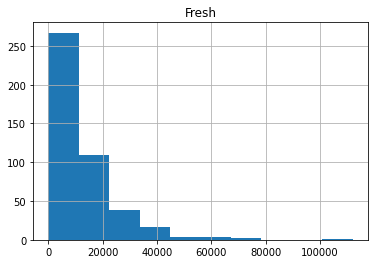

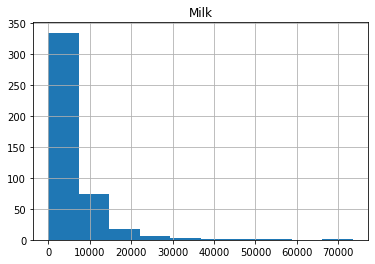

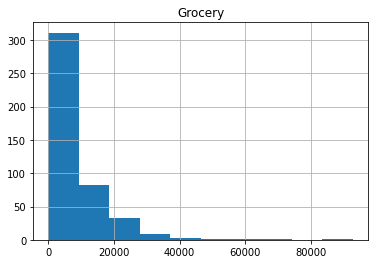

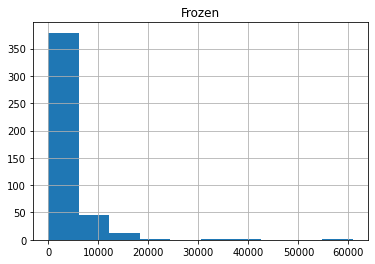

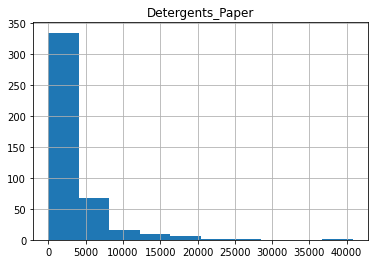

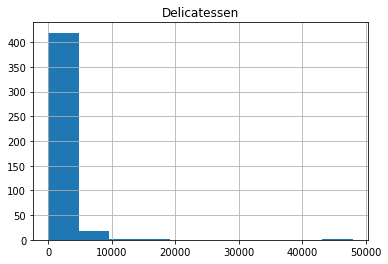

In [166]:
for i in df.columns:
  df[i].hist()
  plt.title(i)
  plt.show()

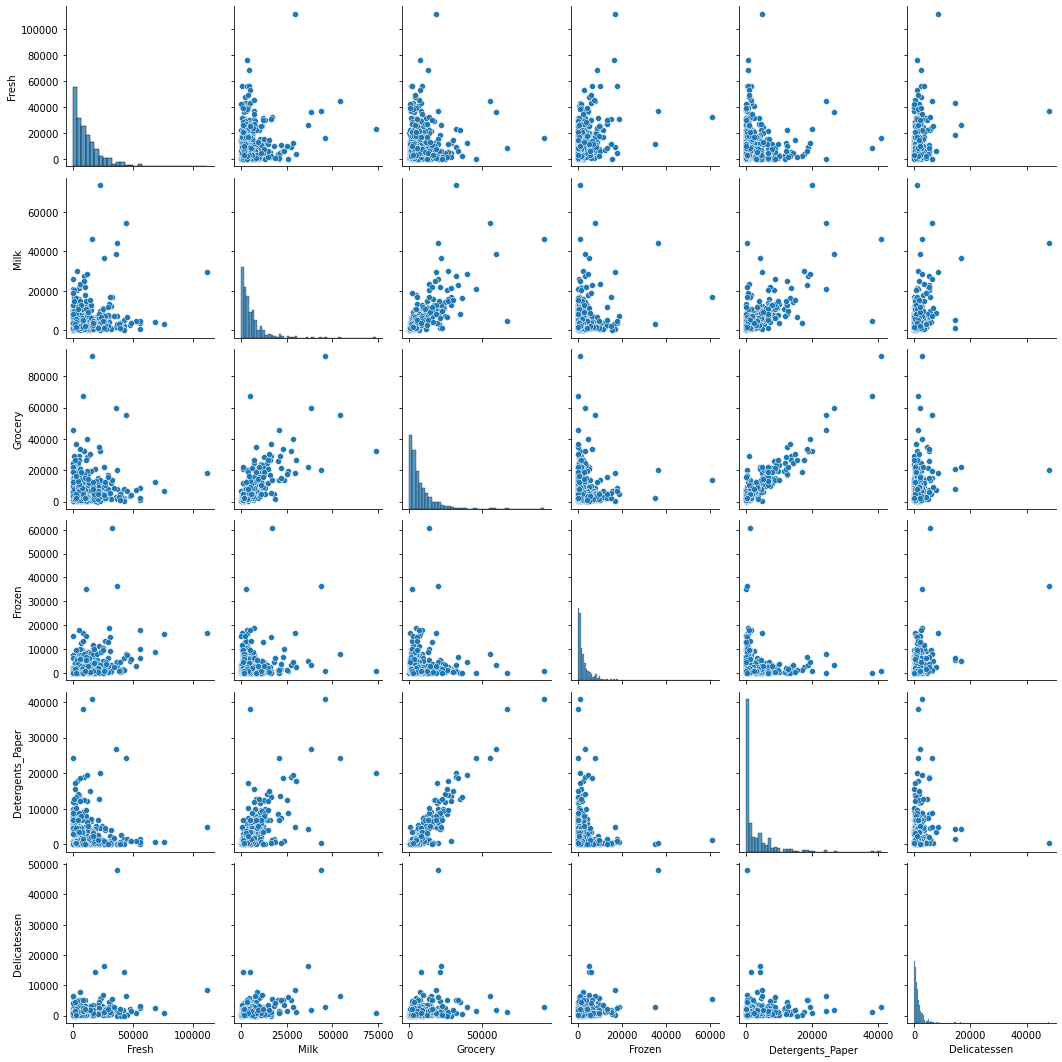

In [168]:
sns.pairplot(data=df)

**Observations:**

1. We could observe the data is right-skewed from the above plots.
2. We could see high correlation between groceries and detergents_paper

# **Data Preprocessing**

As we observed the skewness in the data, let's try to normalize it by applying log function.

In [169]:
for i in df.columns:
  df[i]=np.log(df[i])

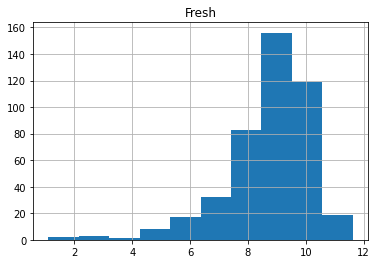

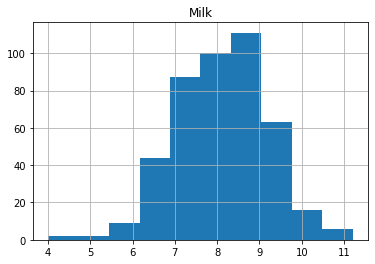

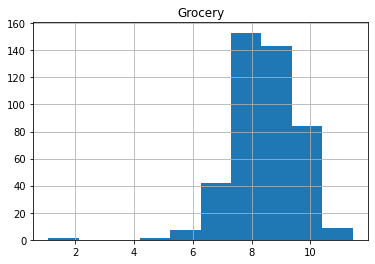

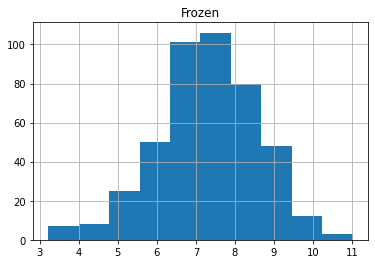

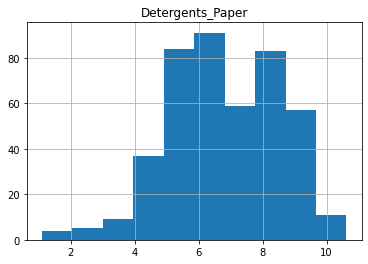

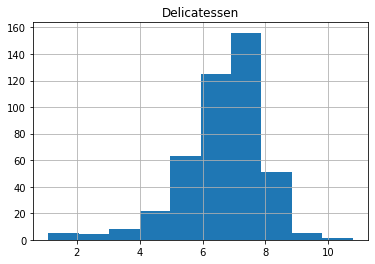

In [170]:
for i in df.columns:
  df[i].hist()
  plt.title(i)
  plt.show()

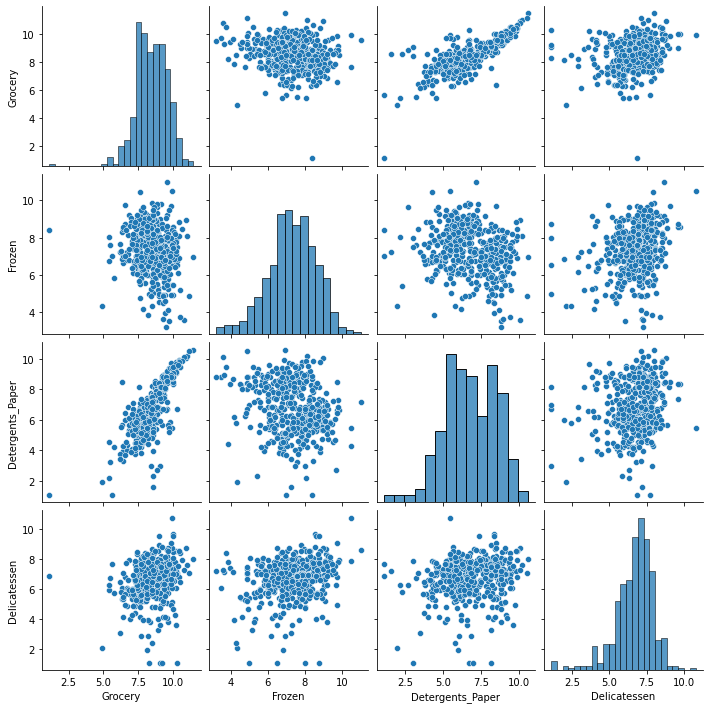

In [171]:
sns.pairplot(data=df)

We could see the data is more normal after applying the log function.

# **Detecting Outliers**

In [172]:
outliers=[]
out=[]
for i in df.columns:
  Q1=np.percentile(df[i],25)
  Q3=np.percentile(df[i],75)
  step=(Q3-Q1)*1.5
  outliers.extend(df[(df[i] <= Q1 - step) | (df[i] >= Q3 + step)].index)
from collections import Counter
count=Counter(outliers)
for i in count.keys():
  if count[i]>1: out.extend([i]*count[i])
final_data=df.drop(df.index[out])
final_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [173]:
#These elements are considered as outliers for more than one feature.
for i in count.keys():
  if count[i]>1: print(i)

65
66
128
154
75


# **Feature Transformation**
**PCA**
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the good_data to discover which dimensions about the data best maximize the variance of features involved.

In [174]:
from sklearn.decomposition import PCA
pca=PCA(2)
pca.fit(final_data)
pca_data=pca.transform(final_data)
pca_data=pd.DataFrame(pca_data,columns=['Dimension 1','Dimension 2'])

In [175]:
pca_data

,Dimension 1,Dimension 2
0,-1.757983,0.009711
1,-1.788665,-0.812251
2,-1.883353,-1.599135
3,1.155265,-1.405201
4,-0.784786,-2.394294
...,...,...
430,0.644850,-2.858285
431,3.184831,-1.944772
432,-3.742535,-0.856146
433,1.669147,-0.397968


# **Clustering**

In [195]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
cluster_lables=np.arange(2,10)
scores={}
for i in cluster_lables:
  model=KMeans(n_clusters=i).fit(final_data)
  preds=model.predict(final_data)
  scores[i]=silhouette_score(final_data,preds)

#Finding the best score and clustering the data.
s1=list(scores.values())
max_val=np.max(s1)
for i in range(len(s1)):
  if s1[i]==max_val:
    best_k=list(scores.keys())[i]

#building the model with best k value

opt_model=KMeans(best_k).fit(final_data)
opt_preds=opt_model.predict(final_data)
kmeans_centers=opt_model.cluster_centers_
final_score=silhouette_score(final_data,opt_preds)

print(scores)

{2: 0.3044575537556553, 3: 0.2621333099186489, 4: 0.19529772200024365, 5: 0.2019306876210561, 6: 0.20914963054604557, 7: 0.20397965008043983, 8: 0.18424703026956618, 9: 0.1878403254584724}


Silhouette score is high when there are two clusters.